In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from helper import *
import geopandas as gpd
from shapely.geometry import Point
import contextily as ctx

In [ ]:
alldata = pd.read_csv('./data/final/all_data.csv', sep=';', chunksize=5e5)

/tmp/ipykernel_13710/665777419.py:8: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv('./data/final/all_data.csv', chunksize=5e5, sep=';', parse_dates=['data de abertura']):
/tmp/ipykernel_13710/665777419.py:8: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv('./data/final/all_data.csv', chunksize=5e5, sep=';', parse_dates=['data de abertura']):
/tmp/ipykernel_13710/665777419.py:8: DtypeWarning: Columns (7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv('./data/final/all_data.csv', chunksize=5e5, sep=';', parse_dates=['data de abertura']):
/tmp/ipykernel_13710/665777419.py:8: DtypeWarning: Columns (7,8,13) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv('./data/final/all_data.csv', chunksize=5e5, sep=';', parse_dates=['data d

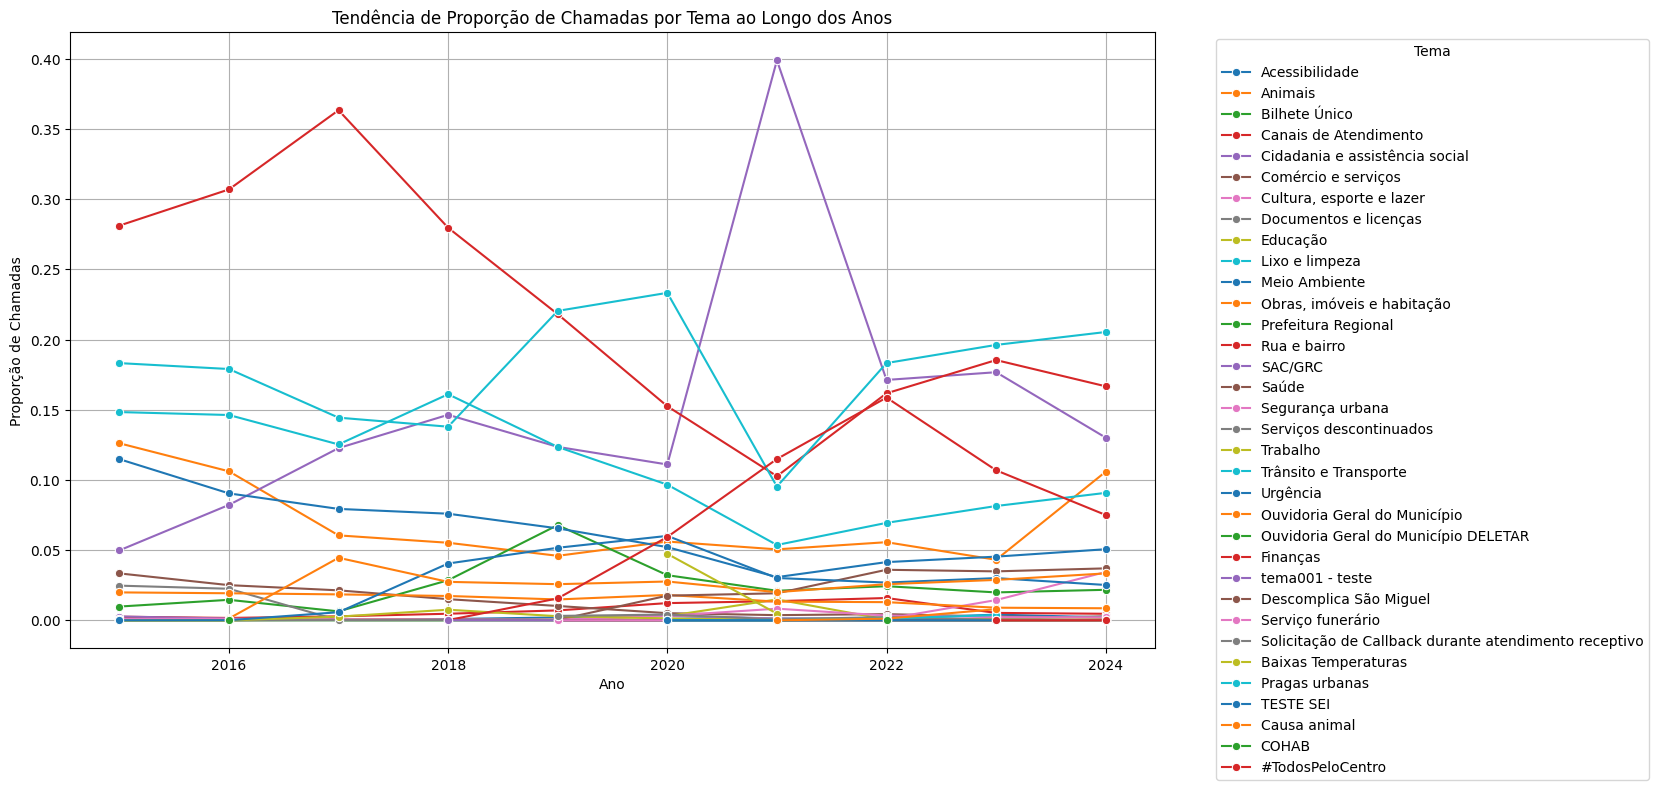

       year                                               tema   count  \
111  2020.0                                     Acessibilidade    3539   
112  2020.0                                            Animais   64967   
113  2020.0                                Baixas Temperaturas   54824   
114  2020.0                                      Bilhete Único   37217   
115  2020.0                              Canais de Atendimento   14200   
116  2020.0                     Cidadania e assistência social  128507   
117  2020.0                                Comércio e serviços    5897   
118  2020.0                           Cultura, esporte e lazer    4028   
119  2020.0                             Descomplica São Miguel       2   
120  2020.0                              Documentos e licenças     316   
121  2020.0                                           Educação    3477   
122  2020.0                                           Finanças   68735   
123  2020.0                           

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

aggregated_data = pd.DataFrame()

# Lendo o CSV em chunks
for chunk in pd.read_csv('./data/final/all_data.csv', chunksize=5e5, sep=';', parse_dates=['data de abertura']):
    # Extraindo o ano
    chunk['year'] = chunk['data de abertura'].dt.year

    # Contando o número de ocorrências de cada tema por ano no chunk
    chunk_count = chunk.groupby(['year', 'tema']).size().reset_index(name='count')

    # Acumulando os resultados
    aggregated_data = pd.concat([aggregated_data, chunk_count], ignore_index=True)

# Agrupando os dados agregados para somar as contagens por tema e ano
final_count_data = aggregated_data.groupby(['year', 'tema']).sum().reset_index()

# Calculando a proporção de chamadas de cada tema em relação ao total de chamadas no ano
total_per_year = final_count_data.groupby('year')['count'].sum().reset_index(name='total_count')
final_count_data = final_count_data.merge(total_per_year, on='year')
final_count_data['proportion'] = final_count_data['count'] / final_count_data['total_count']

# Filtrando os dados para 2020 e 2021
recent_years = final_count_data[final_count_data['year'].isin([2020, 2021])]

# Plotando a tendência de proporção de temas ao longo dos anos
plt.figure(figsize=(14, 8))
sns.lineplot(data=final_count_data, x='year', y='proportion', hue='tema', marker='o', palette='tab10')
plt.title('Tendência de Proporção de Chamadas por Tema ao Longo dos Anos')
plt.xlabel('Ano')
plt.ylabel('Proporção de Chamadas')
plt.grid(True)
plt.legend(title='Tema', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

print(recent_years)

# Exemplo de uso
# trending_themes = detect_trending_themes_from_chunks('path_to_your_large_csv_file.csv')
